# Business Objective
Customer churn is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on revenues. Companies often seek to know which customers are likely to churn in the recent future so that timely action can be taken to prevent it.

## Problem Statement
Build a Logistic Regression Machine Learning model that predicts which customers are likely to churn.

In [1]:
import pandas as pd
import os
df=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\Capstone Project\Dataset.csv")
ChurnModelling=pd.read_csv(df)
ChurnModelling

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


## 2. Data Visualization
We'll create bivariate plots for each independent variable against the target variable (Churn).

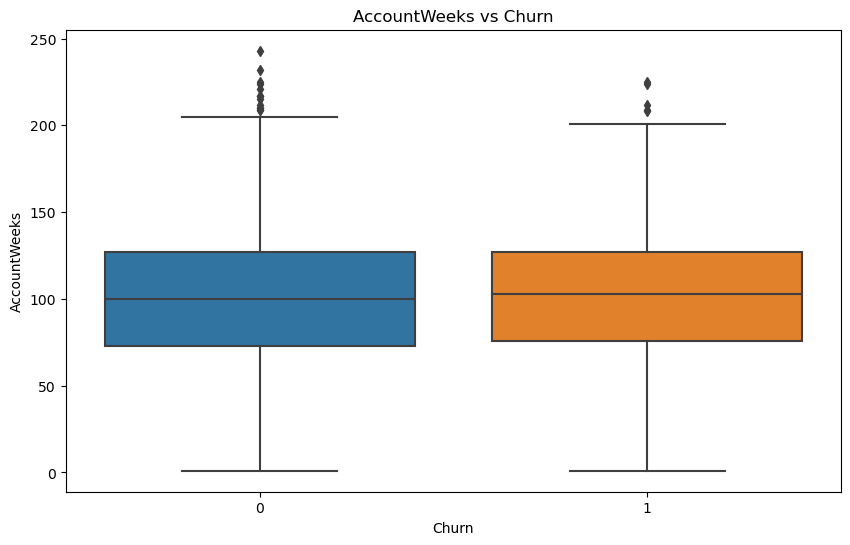

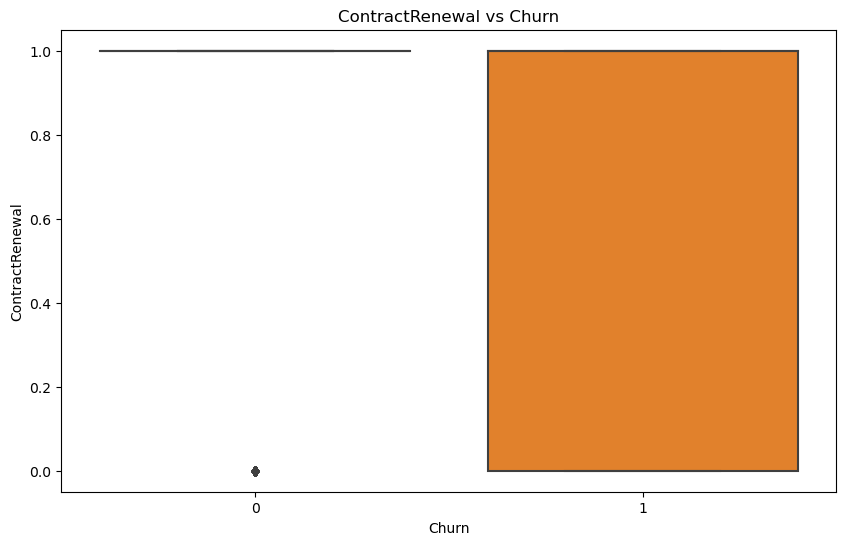

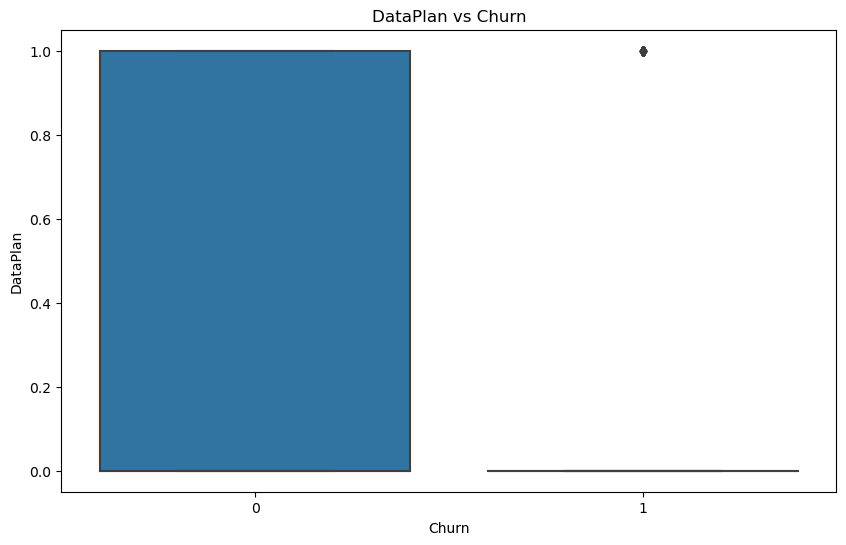

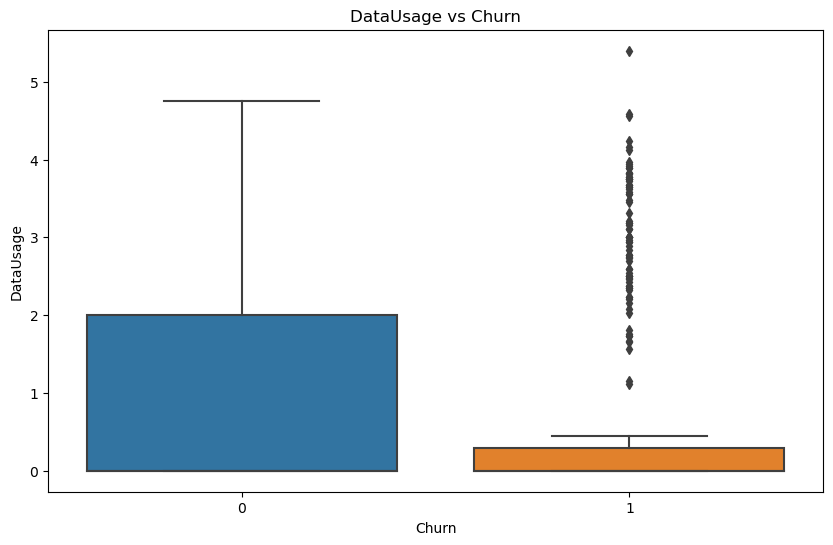

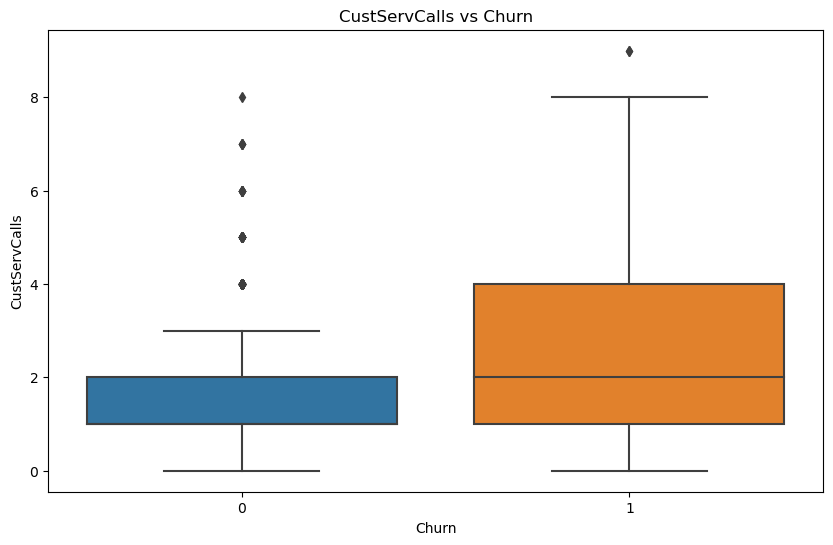

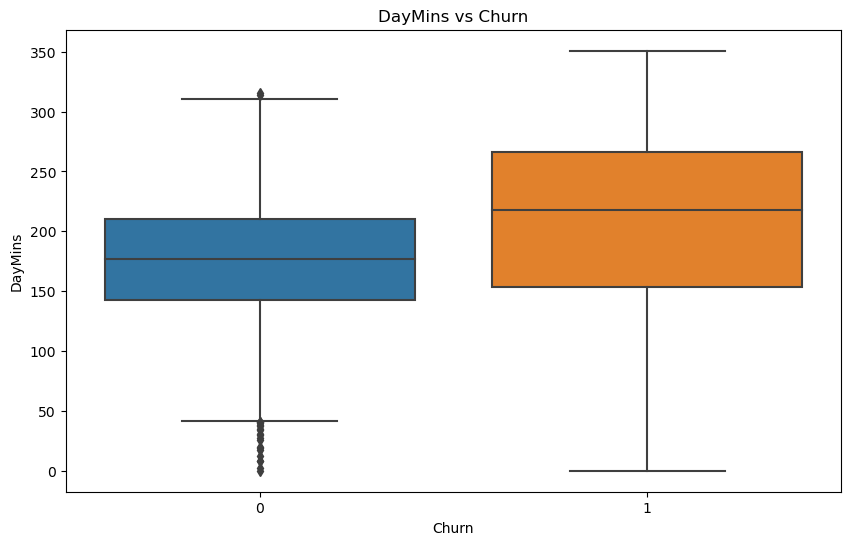

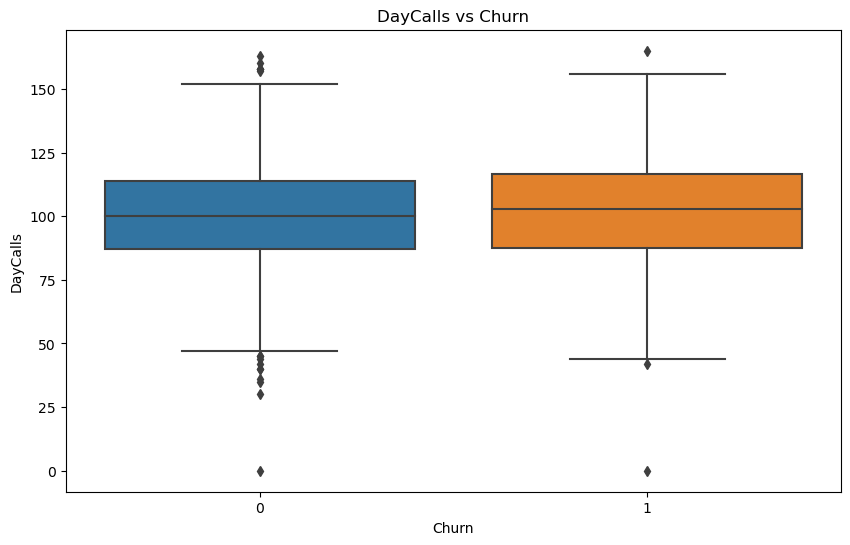

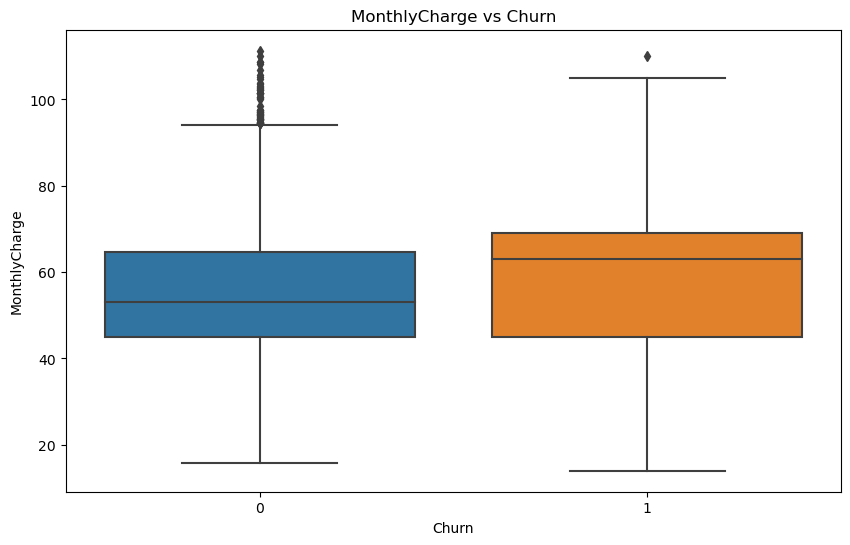

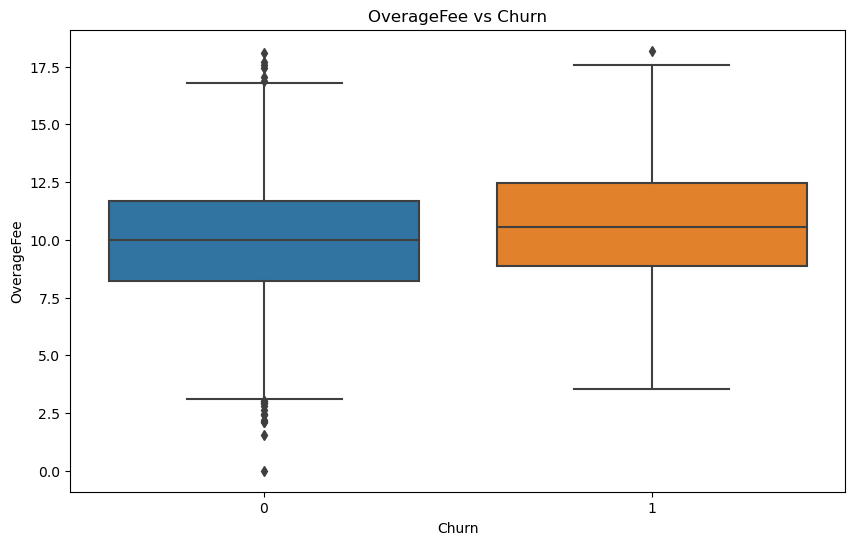

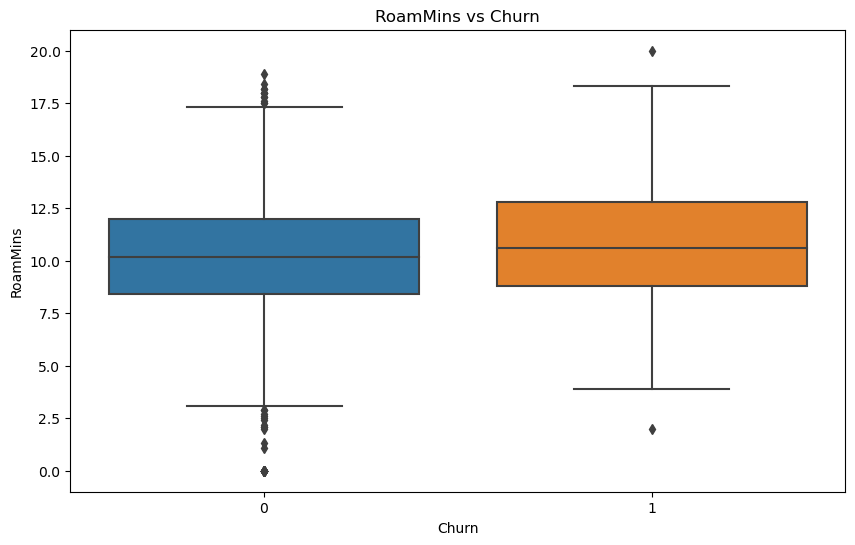

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against the target variable
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

# Plotting
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=ChurnModelling)
    plt.title(f'{feature} vs Churn')
    plt.show()


## 3. Feature Engineering
We need to handle categorical variables and possibly create new features.

In [3]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(ChurnModelling, columns=['ContractRenewal', 'DataPlan'], drop_first=True)

# Check for any missing values
ChurnModelling.isnull().sum()


Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [4]:
ChurnModelling.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## 4. Model Building
We'll split the dataset into training and testing sets, and then build the logistic regression model.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score

# Define features and target variable
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_prob))

# Additional Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC Score: {roc_auc:.2f}")


Confusion Matrix:
[[355 211]
 [ 10  91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.76       566
           1       0.30      0.90      0.45       101

    accuracy                           0.67       667
   macro avg       0.64      0.76      0.61       667
weighted avg       0.87      0.67      0.72       667


AUC-ROC Score:
0.8259454920757092
Accuracy: 0.67
Precision: 0.30
Recall: 0.90
AUC-ROC Score: 0.83


## Model Evaluation
Evaluate the model using various metrics and visualize the ROC curve.

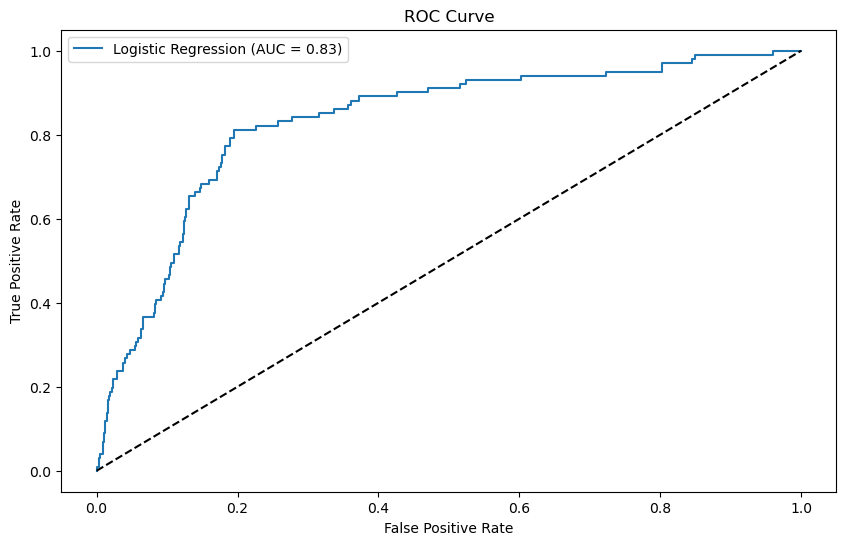

In [6]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Check for Class Imbalance
First, we need to check the distribution of the target variable (Churn) to see if there is any imbalance.

In [7]:
# Check the distribution of the target variable
churn_distribution = ChurnModelling['Churn'].value_counts(normalize=True)
print(churn_distribution)

0    0.855086
1    0.144914
Name: Churn, dtype: float64


## Handle Class Imbalance
If we find that the dataset is imbalanced (e.g., one class significantly outnumbers the other), we can handle it using techniques like oversampling the minority class, undersampling the majority class, or using SMOTE (Synthetic Minority Over-sampling Technique).

Confusion Matrix:
[[461 105]
 [ 24  77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       566
           1       0.42      0.76      0.54       101

    accuracy                           0.81       667
   macro avg       0.69      0.79      0.71       667
weighted avg       0.87      0.81      0.83       667

Accuracy: 0.81
Precision: 0.42
Recall: 0.76
AUC-ROC Score: 0.83


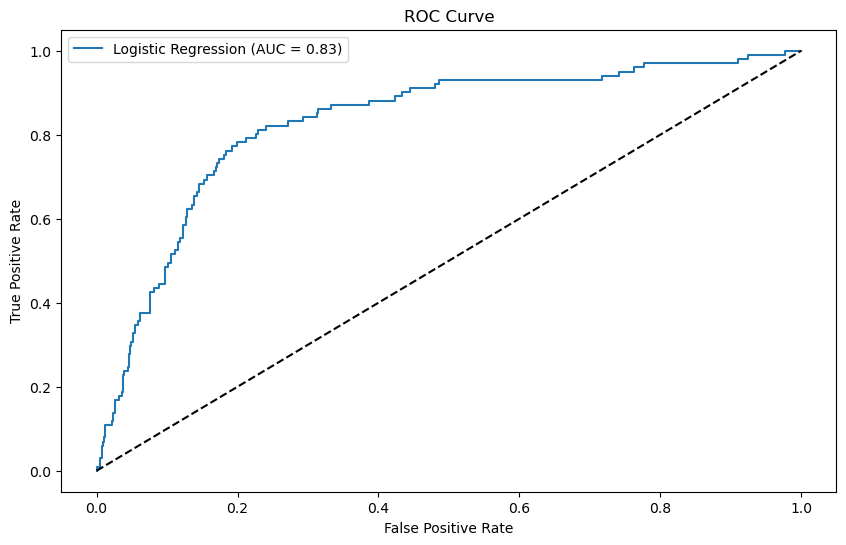

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score

# Define features and target variable
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Build logistic regression model
logreg_model_smote = LogisticRegression()
logreg_model_smote.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Additional Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Building a Decision tree model without SMOTE approach

Decision Tree without SMOTE - Confusion Matrix:
[[526  40]
 [ 43  58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       566
           1       0.59      0.57      0.58       101

    accuracy                           0.88       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.87      0.88      0.87       667

Accuracy: 0.88
Precision: 0.59
Recall: 0.57
AUC-ROC Score: 0.75


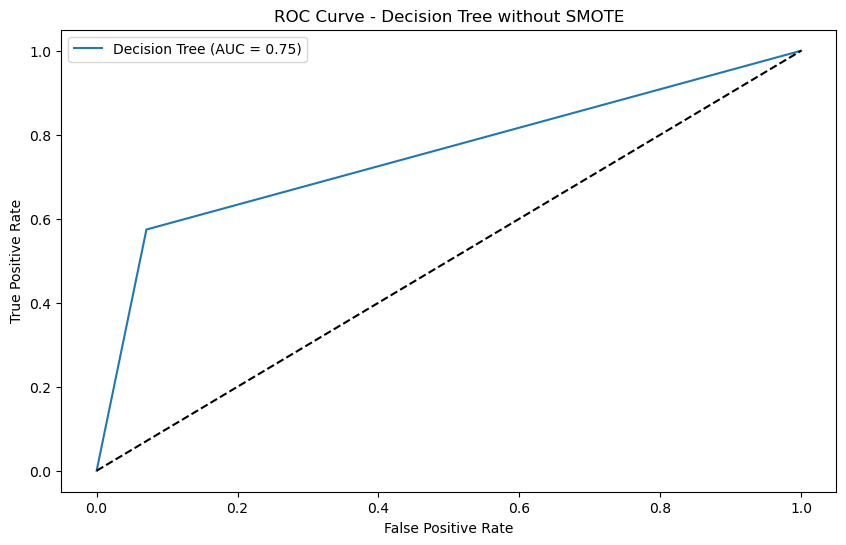

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Define features and target variable
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Decision Tree without SMOTE - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Additional Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"AUC-ROC Score: {roc_auc_dt:.2f}")

# Plotting ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree without SMOTE')
plt.legend()
plt.show()


# Decision tree model using SMOTE approach to handle imbalances in the dataset

Decision Tree with SMOTE - Confusion Matrix:
[[506  60]
 [ 32  69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       566
           1       0.53      0.68      0.60       101

    accuracy                           0.86       667
   macro avg       0.74      0.79      0.76       667
weighted avg       0.88      0.86      0.87       667

Accuracy: 0.86
Precision: 0.53
Recall: 0.68
AUC-ROC Score: 0.79


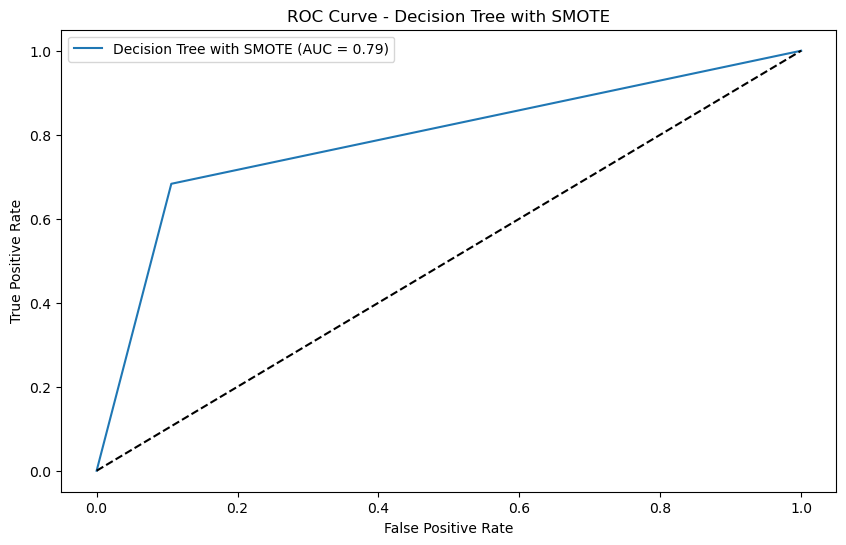

In [13]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Build decision tree model with SMOTE
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_dt_smote = dt_model_smote.predict(X_test)
y_prob_dt_smote = dt_model_smote.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Decision Tree with SMOTE - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_smote))

# Additional Metrics
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
precision_dt_smote = precision_score(y_test, y_pred_dt_smote)
recall_dt_smote = recall_score(y_test, y_pred_dt_smote)
roc_auc_dt_smote = roc_auc_score(y_test, y_prob_dt_smote)

print(f"Accuracy: {accuracy_dt_smote:.2f}")
print(f"Precision: {precision_dt_smote:.2f}")
print(f"Recall: {recall_dt_smote:.2f}")
print(f"AUC-ROC Score: {roc_auc_dt_smote:.2f}")

# Plotting ROC curve
fpr_dt_smote, tpr_dt_smote, thresholds_dt_smote = roc_curve(y_test, y_prob_dt_smote)
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt_smote, tpr_dt_smote, label='Decision Tree with SMOTE (AUC = {:.2f})'.format(roc_auc_dt_smote))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree with SMOTE')
plt.legend()
plt.show()



# Comparison of Logistic Regression and Decision Tree Models
comparing the performance of Logistic Regression and Decision Tree models, both with and without SMOTE.

In [17]:
# Logistic Regression results 
logistic_regression_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "AUC-ROC": roc_auc
}

# Decision Tree results
decision_tree_results = {
    "Accuracy": accuracy_dt,
    "Precision": precision_dt,
    "Recall": recall_dt,
    "AUC-ROC": roc_auc_dt
}

# Decision Tree with SMOTE results
decision_tree_smote_results = {
    "Accuracy": accuracy_dt_smote,
    "Precision": precision_dt_smote,
    "Recall": recall_dt_smote,
    "AUC-ROC": roc_auc_dt_smote
}

# Print comparison
print("Logistic Regression Results:", logistic_regression_results)
print("Decision Tree Results:", decision_tree_results)
print("Decision Tree with SMOTE Results:", decision_tree_smote_results)

# Get the coefficients and feature names for logistic regression without SMOTE
coefficients = pd.Series(logreg_model.coef_[0], index=data.drop('Churn', axis=1).columns)
important_features_logreg = coefficients.abs().sort_values(ascending=False)
print("Key variables contributing to higher churn - Logistic Regression without SMOTE:")
print(important_features_logreg.head())

# Get the coefficients and feature names for logistic regression with SMOTE
coefficients_smote = pd.Series(logreg_model_smote.coef_[0], index=data.drop('Churn', axis=1).columns)
important_features_logreg_smote = coefficients_smote.abs().sort_values(ascending=False)
print("Key variables contributing to higher churn - Logistic Regression with SMOTE:")
print(important_features_logreg_smote.head())

# Key variables contributing to higher churn
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances_smote = pd.Series(dt_model_smote.feature_importances_, index=X.columns)

print("Key Variables contributing to higher churn - Decision Tree:")
print(importances.sort_values(ascending=False).head())

print("Key Variables contributing to higher churn - Decision Tree with SMOTE:")
print(importances_smote.sort_values(ascending=False).head())


Logistic Regression Results: {'Accuracy': 0.8065967016491754, 'Precision': 0.4230769230769231, 'Recall': 0.7623762376237624, 'AUC-ROC': 0.8288318231116398}
Decision Tree Results: {'Accuracy': 0.8755622188905547, 'Precision': 0.5918367346938775, 'Recall': 0.5742574257425742, 'AUC-ROC': 0.7517930238253507}
Decision Tree with SMOTE Results: {'Accuracy': 0.8620689655172413, 'Precision': 0.5348837209302325, 'Recall': 0.6831683168316832, 'AUC-ROC': 0.7885806248469371}
Key variables contributing to higher churn - Logistic Regression without SMOTE:
DayCalls         0.673327
DataUsage        0.599897
MonthlyCharge    0.493804
CustServCalls    0.411765
RoamMins         0.254184
dtype: float64
Key variables contributing to higher churn - Logistic Regression with SMOTE:
DataUsage        1.265006
CustServCalls    1.264679
DayCalls         0.758844
RoamMins         0.701690
MonthlyCharge    0.317587
dtype: float64
Key Variables contributing to higher churn - Decision Tree:
DayMins          0.215760
